# Classifying Data with Logistic Regression in Python

## Learning Objectives
Logistic Regression is one of the simplest and most commonly used classification approaches in machine learning. Logistic regression allows us to model the relationship between independent variables and the probability of a categorical response (such as True or False, Yes or No). By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Logistic Regression model
+ How to evaluate a Logistic Regression model
+ How to interpret the coefficients of a Logistic Regression model 

## 1. Collect the Data

Before we import our data, we must first import the `pandas` package.

In [1]:
import pandas as pd

Now, we can import our data into a dataframe called `loan`.

In [2]:
loan = pd.read_csv("loan.csv")

To verify that the import worked as expected, let’s use the `head()` method of the pandas dataframe to preview the data.

In [3]:
loan.head()

,Income,Loan Amount,Default
0,30,8,No
1,22,10,No
2,33,12,No
3,28,20,No
4,23,32,No


Our dataset has three columns. The first two - `Income` and `Loan Amount` - are the predictors (or independent variables), while the last one - `Default` - is the response (or dependent variable).

In this exercise, we’ll use this `loan` data to train a logistic regression model to predict whether a borrower will default or not default on a new loan based on their income and the amount of money they intend to borrow. 

## 2. Explore the Data

Now that we have our data, let's try to understand it.

First, let's get a concise summary of the structure of the data by calling the `info()` method of the `loan` dataframe.

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


By looking at the `RangeIndex` value from the summary, we can tell that there are 30 instances (or rows) in the dataset. 

The `Data columns` value shows that the dataset consists of 3 features (or columns). Looking at the `Dtype` column within this section, we see that the `Income` and `Loan Amount` columns hold integer values, while the `Default` column holds text (aka object).

Next, let's get summary statistics for the numeric features in the data by calling the `describe()` method of the dataframe.

In [5]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,20.966667,54.233333
std,6.195011,28.231412
min,12.000000,8.000000
25%,16.250000,32.000000
50%,20.500000,54.500000
75%,24.750000,71.750000
max,34.000000,110.000000


From the statistics, we can see the average, standard deviation, minimum, and maximum values for both the `Income` and `Loan Amount` variables. We also get the 25th, 50th and 75th percentile values for both variables.

Note that the values are in the thousands, so the minimum and maximum income values are \\$12,000 and \\$34,000, respectively. 

Now that we've described our data structurally and numerically, let’s describe it visually as well.

### Boxplot
Before we create the plots we need, we must first import a couple of packages. The first is the `matplotlib` package and the second is the `seaborn` package.

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

Let's start by creating a boxplot that highlights the difference in annual income between those that did not default on their loan (No) and those that did default (Yes). 

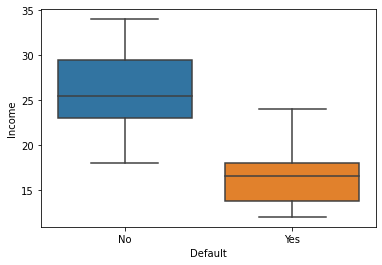

In [7]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Income')

The chart shows that those that did not default on their loans tend to have a higher annual income than those that did default on their loans. 

Next, let's create another box plot to highlight the difference in amount borrowed between those that did not default on their loans and those that did.

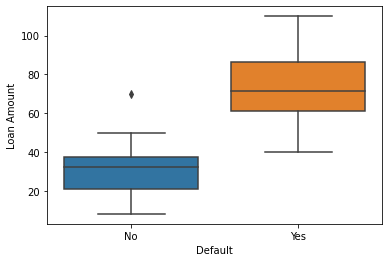

In [8]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Loan Amount')

This chart shows that those that defaulted on their loans tend to have borrowed more money than those that did not default.

### Scatterplot
If we recode the `Default` feature values 'No' and 'Yes' to '0' and '1', we can also use a scatterplot to get a slightly different perspective of our data. 

However, before we do so, we must first import the `numpy` package.

In [9]:
import numpy as np

Now, we can create a scatterplot that describes the relationship between the annual income of borrowers and loan outcomes. 

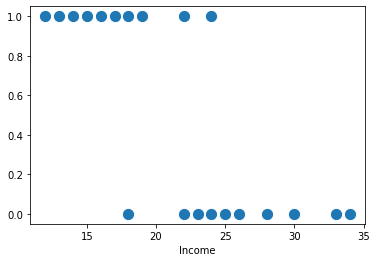

In [10]:
ax = sns.scatterplot(x = loan['Income'], 
                     y = np.where(loan['Default'] == 'No', 0, 1), 
                     s = 150)

We can also describe the relationship between the amount borrowed and loan outcomes. 

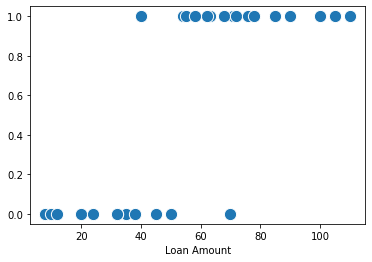

In [11]:
ax = sns.scatterplot(x = loan['Loan Amount'], 
                     y = np.where(loan['Default'] == 'No', 0, 1), 
                     s = 150)

Looking at these two charts, we can easily imagine a sigmoid curve that fits the data. This tells us that a logistic regression function would model the relationship between the predictors (`Income` and `Loan Amount`) and the response (`Default`) well.

## 3. Prepare the Data

Our primary objective in this step is to split our data into training and test sets. The training set will be used to train the model, while the test set will be used to evaluate the model.

Before we split the data, we first need to separate the dependent variable from the independent variables.

Let's start by creating a pandas Series called `y` for the dependent variable.

In [12]:
y = loan['Default']

Then we create a pandas DataFrame called `X` for the independent variables.

In [13]:
X = loan[['Income', 'Loan Amount']]

Next, we import the `train_test_split()` function from the `sklearn.model_selection` subpackage. 

In [14]:
from sklearn.model_selection import train_test_split

Using the `train_test_split()` function, we can split `X` and `y` into `X_train`, `X_test`, `y_train` and `y_test`.

Note that within the `train_test_split()` function, we will set:

* `train_size` to `0.7`. This means we want $70\%$ of the original data to be assigned to the training data while $30\%$ is assigned to the test data. 

* `stratify` as `y`, which means that we want the data split using a stratified random sampling approach based on the values of `y`. 

* `random_state` to `123`, so we get the same results every time we do this split. 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7,
                                                    stratify = y,
                                                    random_state = 123) 

After the data is split, the newly created `X_train` and `X_test` data sets hold the independent variables for the training and test sets, respectively. While the `y_train` and `y_test` data sets hold the dependent variable for the training and test sets respectively.


We can refer to the `shape` attribute of any of the newly created data sets to know how many instances or records are in each. Let's look at the training data.

In [16]:
X_train.shape

(21, 2)

The result is a tuple that holds the number of rows and columns in the `X_train` dataframe. It tells us that $21$ out of the $30$ instances in the `loans` data were assigned to the training set.

Let's look at the test set as well.

In [17]:
X_test.shape

(9, 2)

The result tells us that $9$ out of the $30$ instances in the `loans` data were assigned to the test set.

## 4. Train and Evaluate the Model

We are going to use the `LogisticRegression` class from the `sklearn.linear_model` subpackage to train our model. Let's import it.

In [18]:
from sklearn.linear_model import LogisticRegression

We can now instantiate a new object called `classifier` from the `LogisticRegression` class.

In [19]:
classifier = LogisticRegression()

To train a model, we pass the training data (`X_train` and `y_train`) to the `fit()` method of the classifier object.

In [20]:
model = classifier.fit(X_train, y_train)

Recall that there are $9$ instances (or rows) in the test set. To predict labels for the test instances, we pass the independent variables of the test set (`X_test`) to the `predict()` method of the model.

In [21]:
model.predict(X_test)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes'],
      dtype=object)

The output lists the predictions made by the model in the order in which the instances appear in the test set.

To evaluate how accurate our model is, we pass the test data (`X_test` and `y_test`) to the `score()` method of the model.

In [22]:
model.score(X_test, y_test)

0.8888888888888888

The result tells us that our Logistic Regression model is able to correctly predict $8$ out of $9$ (or $89\%$) of the labels in the test set.

The accuracy of a model only gives us a one-dimensional perspective of performance. To get a broader perspective, we need to generate a confusion (or error) matrix of the model's performance. 

To do this, we need to import the `confusion_matrix` function from the `sklearn.metrics` subpackage.

In [23]:
from sklearn.metrics import confusion_matrix

Then we pass the dependent variable from the test set (which are the actual labels) and the model's predicted labels to the `confusion_matrix()` function.

In [24]:
confusion_matrix(y_test, model.predict(X_test))

array([[3, 1],
       [0, 5]])

The result is a $ 2\times 2$ array that shows how many instances the model predicted correctly or incorrectly as either `Yes` or `No`. This confusion matrix can be illustrated as follows:

<div>
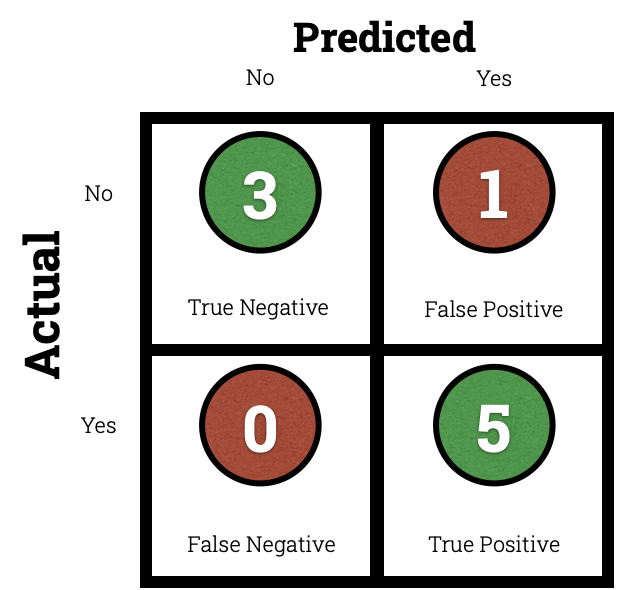
</div>



The first row of the matrix shows that of the $4$ instances that were actually `No`, the model predicted $3$ of them as `No` but $1$ of them as `Yes`. The second row of the matrix shows that of the $5$ instances that were actually `Yes`, the model predicted all $5$ correctly as `Yes`.

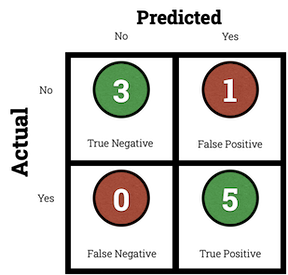

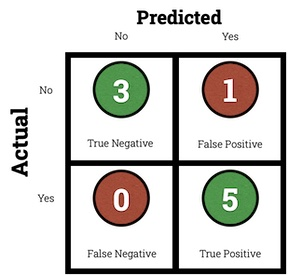

## 5. Interpret the Model

Now that we've built a Logistic Regression model and evaluated the performance of the model on the test data, we can now interpret the model's output. Specifically, the model coefficients.

The relatonship between the dependent and independent variables in a Logistic Regression model is generally represented as follows:

$$ log(\frac{P}{1 - P}) = \beta_{0} + \beta_{1}X_{1} + ...+ \beta_{n}X_{n}$$

In this representation, the left hand side of the equaton is known as the **logit** or the log-odds of the probability of an outcome or class $P$. $\beta_{0}$ is the intercept. $\beta_{1}$ to $\beta_{n}$ are the coefficients of the independent variables $X_{1}$ to $X_{n}$.

To get the intercept (or $\beta_{0}$), we refer to the `intercept_` attribute of our model.

In [25]:
model.intercept_

array([15.4670632])

To get the other model coefficients ($\beta_{1}$ and $\beta_{2}$), we refer to the `coef_` attribute of our model.

In [26]:
model.coef_

array([[-1.0178107 ,  0.14656096]])

The model coefficients correspond to the order in which the independent variables are listed in the training data. This means that the equation for our Logistic Regression model can be written as:

$$ log(\frac{P}{1 - P}) = 15.4670632 -1.0178107 \times \text{Income} + 0.14656096 \times \text{Loan Amount} $$


To make our coefficients easier to work with, let's convert the coefficients from a two-dimenionsal array to a one-dimensional array and round the values to two decimal places.

In [27]:
log_odds = np.round(model.coef_[0], 2)
log_odds

array([-1.02,  0.15])

Next, let's create a pandas DataFrame using the coefficient values and the column names from the training data as row indexes:

In [28]:
pd.DataFrame({'log odds': log_odds}, 
              index = X.columns)

,log odds
Income,-1.02
Loan Amount,0.15


The first coefficient tells us that, when all other variables are held constant, a $\$1$ increase in a borrowers income decreases the log odds that they will default on their loan by $1.02$. 

Likewise, the second coefficent tells us that a $\$1$ increase in the amount a customer borrows, increases the log odds that they will default on their loan by $0.15$ when all other variables are held constant.

Understandably, interpreting the coefficients in terms of log odds is a bit confusing. A more intuitive approach would be to look at them in terms of odds. Let's exponentiate the coefficients so we can interpret them in terms of odds rather than log odds:

In [29]:
odds = np.round(np.exp(log_odds), 2)
pd.DataFrame({'odds': odds}, 
              index = X.columns)

,odds
Income,0.36
Loan Amount,1.16


The first coefficent tells us that for every $\$1$ increase in a borrower's income, the odds that they will default on their loan reduces by $64\%$ ($1 - 0.36$) when all other variables are held constant. Earning more money decreases the odds of default.

The second coefficent tells us that, assuming all other variables are held constant, for every $\$1$ increase in the amount borrowed, the odds that a borrower will default on their loan increases by $16\%$ ($1.16 - 1$). Borrowing more money increases the odds of default.

We can also interpret the second coefficent as saying that for every $\$1$ increase in the amount borrowed, the odds that a borrower will default on their loan increases by a factor of $1.16$, assuming all other variables are held constant.